In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import plotly.express as px

In [2]:
articles = pd.read_csv('data/articles.CSV',encoding='gb2312')
buttons = pd.read_csv('data/buttons.CSV',encoding='gb2312')
content = pd.read_csv('data/content_statistics.CSV',encoding='gb2312')
key_words = pd.read_csv('data/key_words.CSV',encoding='gb2312')
message = pd.read_csv('data/message.CSV',encoding='gb2312')
users = pd.read_csv('data/users.CSV',encoding='gb2312')

In [3]:
def remove_yr(s):
    str=''
    for i in range(5,len(s)):
        str+=s[i]
    return str
def remove_yr2(s):
    s=str(s)
    string=''
    for i in range(4,8):
        if i==6 and s[i]=='0':
            continue
        string+=s[i]
        if i==5:
            string+='/'
    return string
def markers_cnt(s):
    s=s%10000
    if s<1100 :
        return s-1000
    elif s<1200:
        return s-1100+31
    else:
        return s-1200+31+30
    
short_date=users['时间'].apply(remove_yr)
markers_on=articles['发表时间'].apply(markers_cnt)
markers_on

0     83
1     83
2     83
3     83
4     76
5     76
6     69
7     69
8     69
9     63
10    63
11    63
12    47
13    43
14    37
15    34
16    34
17    25
18    25
19    25
20    24
21    24
22    24
23    23
24    23
Name: 发表时间, dtype: int64

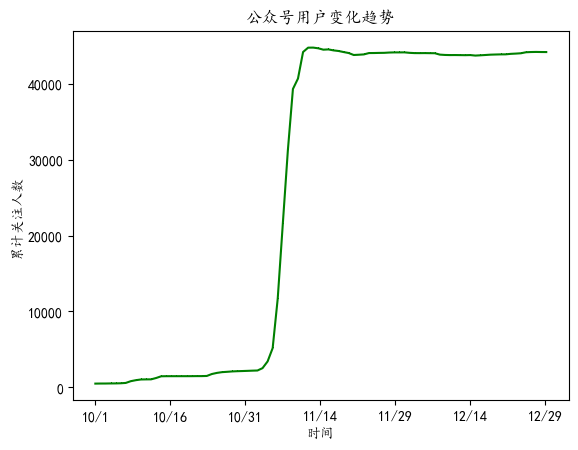

In [4]:
#准备绘制数据
plt.rcParams["font.sans-serif"]="KaiTi"
plt.rcParams["axes.unicode_minus"]=False
x = short_date
y = users['累积关注人数']

# "g" 表示红色，marksize用来设置'D'菱形的大小
plt.plot(x, y, "g", marker=',')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(14.8))

#

#绘制坐标轴标签
plt.xlabel("时间")
plt.ylabel("累计关注人数")
plt.title("公众号用户变化趋势")

#显示图例
#plt.legend(loc="lower right")

plt.savefig("1.jpg")
plt.show()

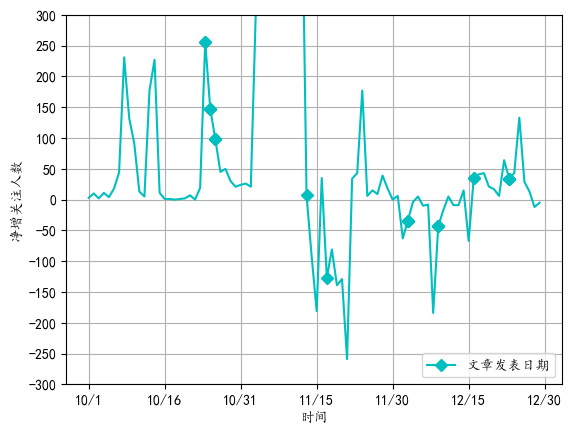

In [5]:
#准备绘制数据
plt.rcParams["font.sans-serif"]="KaiTi"
plt.rcParams["axes.unicode_minus"]=False

x = short_date
y = users['净增关注人数']

# "g" 表示红色，marksize用来设置'D'菱形的大小
plt.plot(x, y, "-cD",markevery=markers_on,label='文章发表日期')

plt.ylim(-300,300)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(15))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))


#绘制坐标轴标签
plt.xlabel("时间")
plt.ylabel("净增关注人数")
plt.title("")

#显示图例
plt.legend(loc="lower right")
plt.grid()
plt.savefig("1.jpg")
plt.show()

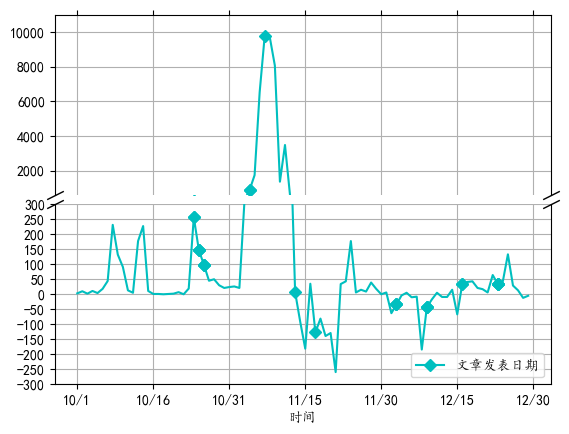

In [6]:
#准备绘制数据
plt.rcParams["font.sans-serif"]="KaiTi"
plt.rcParams["axes.unicode_minus"]=False

x = short_date
y = users['净增关注人数']

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace=0.05)  

# plot the same data on both axes
ax1.plot(x, y, "-cD",markevery=markers_on,label='文章发表日期')
ax2.plot(x, y, "-cD",markevery=markers_on,label='文章发表日期')

plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(15))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50))

# zoom-in / limit the view to different portions of the data
ax2.set_ylim(-300,300)  # outliers only
ax1.set_ylim(600,11000)  # most of the data

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  
ax2.xaxis.tick_bottom()


d = .5  
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

plt.xlabel("时间")
plt.legend(loc="lower right")
ax1.grid()
ax2.grid()
plt.show()